In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("../data/energydata_complete.csv")

In [7]:
df['date'] = pd.to_datetime(df['date'])
df['hour'] = df['date'].dt.hour
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday
df = df.drop(columns=['date'])

# Define features and target
X = df.drop(columns=['Appliances'])
y = df['Appliances']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")


RMSE: 83.43157658111463


In [7]:
joblib.dump(model, "../models/appliances_energy_model.pkl")


['../models/appliances_energy_model.pkl']

Text(0, 0.5, 'Frequency')

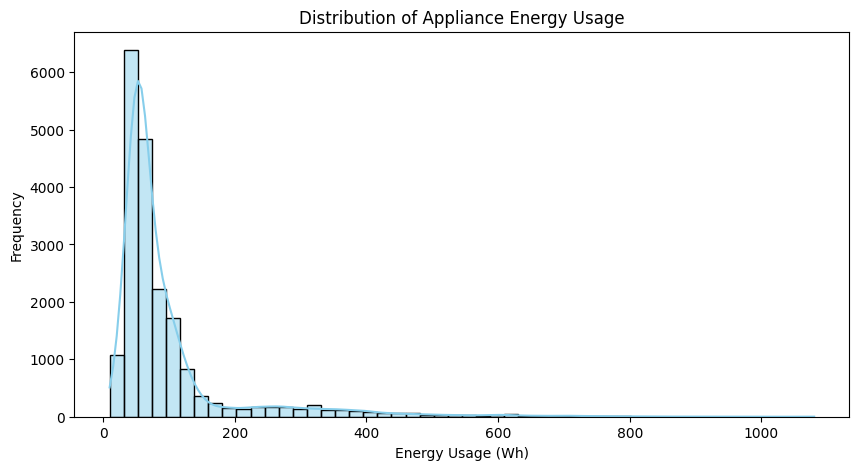

In [13]:
plt.figure(figsize=(10, 5))
sns.histplot(df["Appliances"], bins=50, kde=True, color="skyblue")
plt.title("Distribution of Appliance Energy Usage")
plt.xlabel("Energy Usage (Wh)")
plt.ylabel("Frequency")
# plt.savefig("../plots/appliances_distribution.png")
# plt.close()

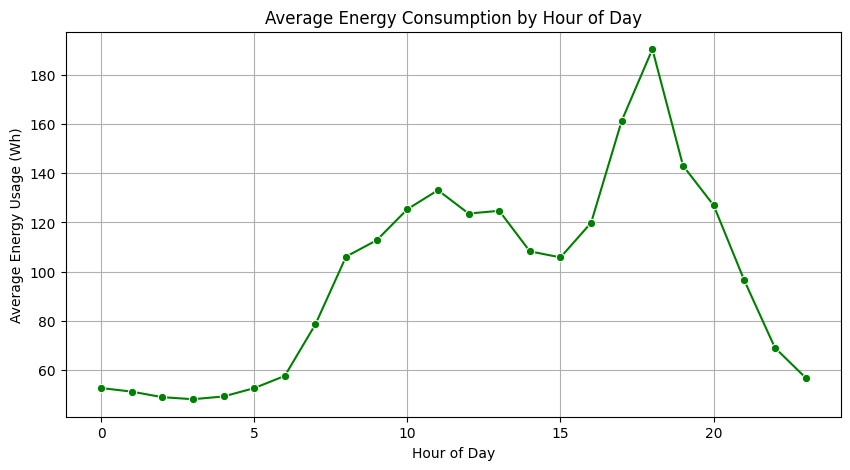

In [16]:
avg_hourly = df.groupby("hour")["Appliances"].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_hourly.index, y=avg_hourly.values, marker="o", color="green")
plt.title("Average Energy Consumption by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Energy Usage (Wh)")
plt.grid(True)
# plt.savefig("../plots/hourly_energy.png")
# plt.close()